<a href="https://colab.research.google.com/github/ahmadhajmosa/Machine-learning-labs/blob/Mareike/Autoencoders_Day3_15%3A30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Auto Encoders with Keras

![alt text](https://cdn-images-1.medium.com/max/1600/1*44eDEuZBEsmG_TCAKRI3Kw@2x.png)

Autoencoding" is a data compression and dimension reduction algorithm where the encoding and decoding functions are 
learned automatically from examples rather than engineered by a human. 

 Autoencoders are lossy, which means that the decompressed outputs will be degraded compared to the original inputs (similar to MP3 or JPEG compression). This differs from lossless arithmetic compression.


# # Autoencoder with fully connected network for MNIST dataset

In [0]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)


# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

display(autoencoder.summary())

encoder = Model(input_img, encoded)


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


None

In [0]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))



autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

(x_train, _), (x_test, _) = mnist.load_data()


x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))



autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


11493376/11490434 [==============================] - 1s 0us/step
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 61us/step - loss: 0.3721 - val_loss: 0.2717
Epoch 2/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.2649 - val_loss: 0.2545
Epoch 3/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.2438 - val_loss: 0.2305
Epoch 4/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.2220 - val_loss: 0.2117
Epoch 5/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.2070 - val_loss: 0.1994
Epoch 6/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.1964 - val_loss: 0.1903
Epoch 7/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.1881 - val_loss: 0.1830
Epoch 8/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.1814 - val_loss: 0.17

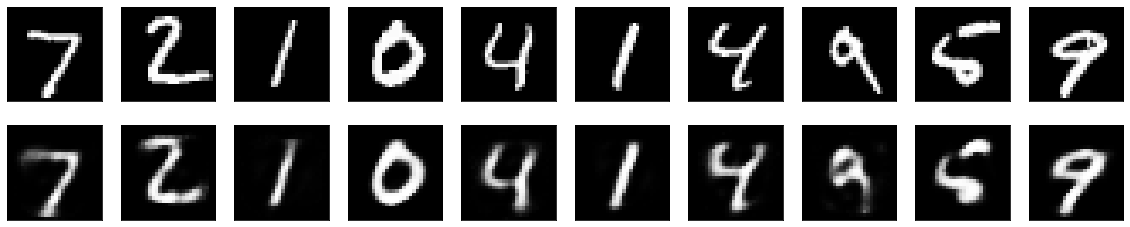

In [0]:

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Sparse AutoEncoder

[]

In [0]:
# [1,0,0,0,1,0,0,1] ->> sum(abs(w))-  a=f(wx+b) || sum(abs(a))
# "0"  [1,0,0,0,1,1,1,1]
# "1"  [0,1,0,0,0,1,1,1]

#sparse "0" [1,0,0,0,0,0,0,1] 
#sparse "1" [0,1,0,0,0,0,1,0] 

# 784 inputs --- 1000 
# 784 inputs ---- 50 sprasity  that 50 out of 1000 can be active at each input
# J(Y-Y_pr) + penalty_weight*sum(abs(a))

from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
from keras.regularizers import l2, l1
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
import numpy as np
penalty_weight = 0.001
# kernel_regularizer for weights regularization
# activity_regularizer for activiations (neurons output) regularization

# this is the size of our encoded representations
encoding_dim = 100  # 1000 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu',activity_regularizer=l1(penalty_weight), name="encoder")(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)


# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

display(autoencoder.summary())

encoder = Model(input_img, encoded)



# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))



autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

(x_train, _), (x_test, _) = mnist.load_data()


x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


mc = ModelCheckpoint('autoencoder.h5', monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)
es = EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=1, mode='auto', baseline=None, restore_best_weights=False)
tb = TensorBoard(log_dir='./', histogram_freq=5, batch_size=32, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None, embeddings_data=None, update_freq='epoch')


autoencoder.load_weights('autoencoder.h5')

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),callbacks=[mc,es,tb])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_20 (Dense)             (None, 784)               79184     
Total params: 157,684
Trainable params: 157,684
Non-trainable params: 0
_________________________________________________________________


None

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 25us/step - loss: 0.2772 - val_loss: 0.2771

Epoch 00001: saving model to autoencoder.h5
Epoch 2/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.2770 - val_loss: 0.2769

Epoch 00002: saving model to autoencoder.h5
Epoch 3/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.2768 - val_loss: 0.2767

Epoch 00003: saving model to autoencoder.h5
Epoch 4/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.2767 - val_loss: 0.2766

Epoch 00004: saving model to autoencoder.h5
Epoch 5/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.2765 - val_loss: 0.2764

Epoch 00005: saving model to autoencoder.h5
Epoch 6/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.2764 - val_loss: 0.2763

Epoch 00006: saving model to autoencoder.h5
Epoch 7/50
60000/60000 [==========================

In [0]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

LOG_DIR = './'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

get_ipython().system_raw('./ngrok http 6006 &')

! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

--2019-06-07 13:21:53--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 35.173.3.255, 52.3.53.115, 52.86.186.182, ...
Connecting to bin.equinox.io (bin.equinox.io)|35.173.3.255|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16648024 (16M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  15.88M  20.0MB/s    in 0.8s    

2019-06-07 13:21:55 (20.0 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [16648024/16648024]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
https://99a6a806.ngrok.io


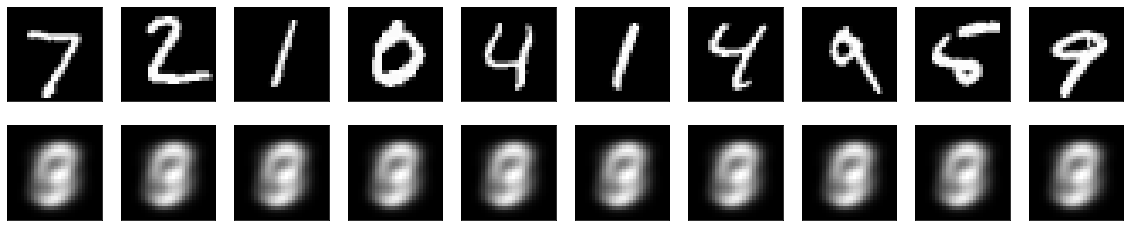

In [0]:
## custom regularization

###from keras import backend as K

###def l1_reg(weight_matrix):
###    return 0.01 * K.sum(K.abs(weight_matrix))

###model.add(Dense(64, input_dim=64,
 #               kernel_regularizer=l1_reg))
    
    
    
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Deep Autoencoder

# Convolutional Autoencoder

In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional
# [1,2,3]  [1,(1+2)/2,2,(2+3)/2,3]-- 3 -> 6 
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
autoencoder = Model(input_img, decoded)
autoencoder.summary()
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 8)           0         
__________

In [0]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  



autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

11493376/11490434 [==============================] - 0s 0us/step
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 5504/60000 [=>............................] - ETA: 1:21 - loss: 0.4443

KeyboardInterrupt: ignored

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


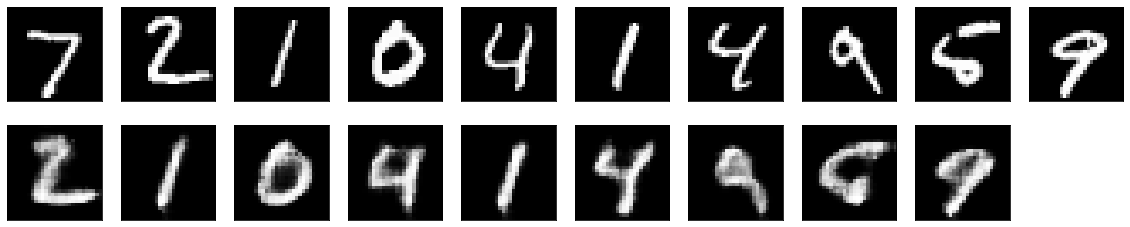

In [0]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Application to image denoising



In [0]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

Exception ignored in: <bound method BaseSession._Callable.__del__ of <tensorflow.python.client.session.BaseSession._Callable object at 0x7f83bc12bcf8>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py", line 1455, in __del__
    self._session._session, self._handle, status)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/errors_impl.py", line 528, in __exit__
    c_api.TF_GetCode(self.status.status))
tensorflow.python.framework.errors_impl.InvalidArgumentError: No such callable handle: 142568104


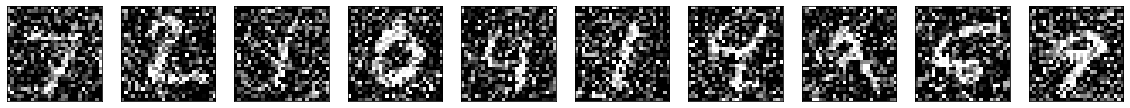

In [0]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 1536/60000 [..............................] - ETA: 3:13 - loss: 0.5623

KeyboardInterrupt: ignored

# Variational autoencoder (VAE)


In [0]:
import keras 
from keras.layers import Input, Dense, Lambda 
from keras.models import Model
from keras import backend as K

batch_size=32

original_dim=784
intermediate_dim=20

latent_dim =2 
encoder_input = Input(shape=(original_dim,))
x = Dense(intermediate_dim, activation='relu')(encoder_input)
x = Dense(100, activation='relu')(x)
x = Dense(50, activation='relu')(x)
h = Dense(intermediate_dim, activation='relu')(x)

z_mean = Dense(latent_dim)(h)
z_log_sigma = Dense(latent_dim)(h)

In [0]:

from keras.layers import Lambda
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(batch_size, latent_dim),
                              mean=0., stddev=1)
    return z_mean + K.exp(z_log_sigma) * epsilon

# note that "output_shape" isn't necessary with the TensorFlow backend
# so you could write `Lambda(sampling)([z_mean, z_log_sigma])`
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_sigma])

In [0]:
x = Dense(intermediate_dim, activation='relu')(z)
x = Dense(50, activation='relu')(x)
h_decoded = Dense(100, activation='relu')(x)

decoder_mean = Dense(original_dim, activation='sigmoid')

x_decoded_mean = decoder_mean(h_decoded)

In [0]:
# end-to-end autoencoder
vae = Model(encoder_input, x_decoded_mean)

# encoder, from inputs to latent space
encoder = Model(encoder_input, z_mean)

# generator, from latent space to reconstructed inputs
decoder_input = Input(shape=(latent_dim,))
_h_decoded = decoder_h(decoder_input)
_x_decoded_mean = decoder_mean(_h_decoded)
generator = Model(decoder_input, _x_decoded_mean)

In [0]:
def vae_loss(x, x_decoded_mean):
    xent_loss = keras.losses.binary_crossentropy(x, x_decoded_mean)
    kl_loss = - 0.01 * K.mean(1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma), axis=-1)
    return xent_loss + kl_loss

vae.compile(optimizer='rmsprop', loss=vae_loss)

In [0]:

from keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

vae.fit(x_train, x_train,
        shuffle=True,
        epochs=100,
        batch_size=batch_size)

Epoch 1/100
60000/60000 [==============================] - 9s 146us/step - loss: 0.2577
Epoch 2/100
60000/60000 [==============================] - 8s 138us/step - loss: 0.2501
Epoch 3/100
60000/60000 [==============================] - 8s 137us/step - loss: 0.2473
Epoch 4/100
60000/60000 [==============================] - 8s 137us/step - loss: 0.2384
Epoch 5/100
60000/60000 [==============================] - 8s 137us/step - loss: 0.2311
Epoch 6/100
60000/60000 [==============================] - 8s 137us/step - loss: 0.2270
Epoch 7/100
60000/60000 [==============================] - 8s 140us/step - loss: 0.2253
Epoch 8/100
60000/60000 [==============================] - 9s 142us/step - loss: 0.2246
Epoch 9/100
60000/60000 [==============================] - 9s 148us/step - loss: 0.2226
Epoch 10/100
60000/60000 [==============================] - 8s 140us/step - loss: 0.2200
Epoch 11/100
60000/60000 [==============================] - 9s 146us/step - loss: 0.2171
Epoch 12/100
60000/60000 [====

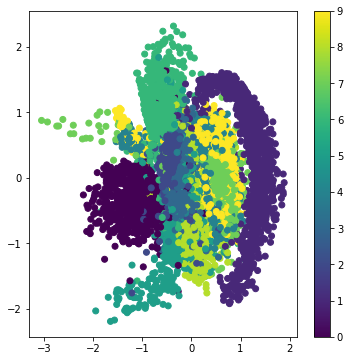

In [0]:
import matplotlib.pyplot as plt

x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()

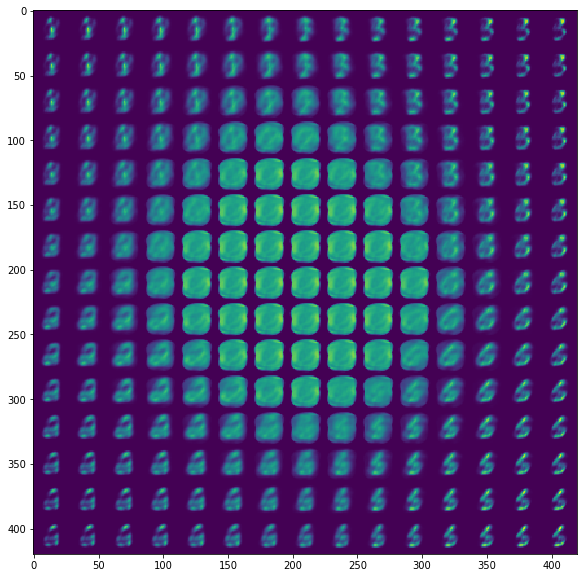

In [0]:
# display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# we will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = generator.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()

![alt text](https://blog.keras.io/img/ae/vae_digits_manifold.png)